In [1]:
import torch

In [12]:
def sigmoid(x):
    return(1/(1+torch.exp(-x)))

In [13]:
features=torch.rand((1,5))
weights=torch.rand_like(features)
bias = torch.rand((1,1))

In [14]:
weights

tensor([[0.6624, 0.2328, 0.8967, 0.2631, 0.6151]])

In [15]:
sigmoid(torch.matmul(features,weights.t()) + bias)

tensor([[0.8961]])

In [25]:
weights=torch.rand((2,5))
bias=torch.rand((1,2))

In [26]:
bias

tensor([[0.9022, 0.6513]])

In [27]:
sigmoid(torch.mm(features,weights.t())+bias)

tensor([[0.9427, 0.7720]])

In [22]:
weights

tensor([[0.2804, 0.2763],
        [0.2634, 0.7519],
        [0.1153, 0.5867],
        [0.6539, 0.6993],
        [0.3234, 0.8312]])

In [28]:
import numpy as np

In [32]:
nparr=np.random.rand(5,5)

In [33]:
torch.from_numpy(nparr)

tensor([[0.3520, 0.3401, 0.5562, 0.4459, 0.6646],
        [0.5880, 0.9199, 0.7996, 0.0240, 0.5681],
        [0.7843, 0.7311, 0.2826, 0.3207, 0.8748],
        [0.1039, 0.0372, 0.5668, 0.2530, 0.2853],
        [0.2441, 0.6119, 0.2061, 0.2331, 0.2396]], dtype=torch.float64)

In [34]:
from torchvision import datasets,transforms

In [37]:
trans=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

In [232]:
data=datasets.MNIST('MNIST/',download=True,train=True,transform=trans)

In [233]:
trainLoader = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

In [42]:
zz=iter(trainLoader)

In [57]:
img,lbl=zz.next()

In [54]:
import matplotlib.pyplot as plt

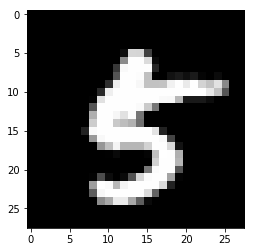

In [68]:
plt.imshow(img[63].numpy().squeeze(),cmap="Greys_r")

In [74]:
zz=img[0]


In [90]:
inputs=img.view(img.shape[0],784)
w1=torch.randn((784,256))
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

hidden=sigmoid(torch.mm(inputs,w1)+b1)
out=torch.mm(hidden,w2)+b2

#sigmoid(torch.mm(img,w1)+b1)

In [98]:
def soft_max(x):
    return(torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

In [100]:
soft_max(out).sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [122]:
import torch.nn as nn

In [128]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1=nn.Linear(786,256)
        self.l2=nn.Linear(256,10)
        
        self.sig=nn.Sigmoid()
        self.sMax = nn.Softmax(dim=1)
    
    def forward(self,x):
        out=self.l1(x)
        out=self.sig(out)
        out=self.l2(out)
        return(self.sMax(out))

In [129]:
model=Network()

In [130]:
model

Network(
  (l1): Linear(in_features=786, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=10, bias=True)
  (sig): Sigmoid()
  (sMax): Softmax()
)

In [131]:
class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(784,256)
        self.l2=nn.Linear(256,10)
    def forward(self,x):
        out=torch.nn.functional.sigmoid(self.l1(x))
        return(torch.nn.functional.softmax(self.l2(out),dim=1))

In [132]:
Network2()

Network2(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=10, bias=True)
)

In [273]:
import torch.nn.functional as F

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, layers): 
        super(FeedforwardNeuralNetModel, self).__init__()
        self.lin=nn.ModuleList()
        self.activationValue = [torch.zeros(i) for i in layers[1:]]
        self.layers = layers
        self.nLayer = len(layers)-1
        for i in range(len(layers)-1):
            self.lin.append(nn.Linear(layers[i],layers[i+1]))

    def forward(self, x):

        for i in range(len(self.layers)-2):
            x=self.lin[i](x)
            x = torch.sigmoid(x)
            self.activationValue[i]=x.clone()
        x=self.lin[self.nLayer-1](x)
        x=F.log_softmax(x,dim=1)
        self.activationValue[self.nLayer-1]=x.clone()
        return x    

In [151]:
FeedforwardNeuralNetModel([784,128,64,10])

FeedforwardNeuralNetModel(
  (lin): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [145]:
x=torch.Tensor([1,2,9,3])

In [170]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),
                    nn.Linear(64,10),nn.LogSoftmax(dim=1)
                   )
loss=nn.NLLLoss()
imgs,lbl=next(iter(trainLoader))
inputs=imgs.view(imgs.shape[0],-1)
op=model(inputs)
lc=loss(op,lbl)

In [171]:
lc.backward()

In [231]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

initial weights


In [164]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10))
loss=nn.CrossEntropyLoss()
imgs,lbl=next(iter(trainLoader))
inputs=imgs.view(imgs.shape[0],-1)
op=model(inputs)
loss(op,lbl)


torch.Size([64])

In [149]:
y

tensor([99.,  2.,  9.,  3.])

In [234]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                   nn.Softmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
epochs =5

for e in range(epochs):
    r_loss=0
    for images,labels in trainLoader:
        images = images.view(images.shape[0],-1)
        op=model(images)
        loss = criterion(op,labels)
        loss.backward()
        optimizer.step()
        r_loss += loss.item()
        
    print(r_loss)


-309.0611777305603
-129.890625
-93.46875
-91.5
-91.40625


## Fashion MNIST classification

In [274]:
data=datasets.FashionMNIST('Fation_MNIST/',download=True,train=True,transform=trans)

In [275]:
trainLoader = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

In [276]:
testset = datasets.FashionMNIST('Fation_MNIST/', train=False, download=True, transform=trans)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False,num_workers=2)

In [277]:
model = FeedforwardNeuralNetModel([784,128,64,10])

In [278]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [279]:
epochs = 10
for i in range(epochs):
    r_loss= 0
    for images,labels in trainLoader:
        images = images.view(images.shape[0],-1)
        preds = model(images)
        loss = criterion(preds,labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        r_loss += loss.item()
    print(r_loss)

565.4530468285084
383.9132212251425
358.45893912017345
340.85695896297693
327.7956899628043
317.8935473486781
305.6696578413248
300.15833285450935
296.4546749740839
288.52294135838747


In [281]:
dataiter=iter(testloader)
images,labels = dataiter.next()
img = images[4].view(1,784)

ps =torch.exp(model(img))

In [284]:
ps.detach().numpy()
labels[4]

tensor(6)

In [285]:
torch.argmax(ps)

tensor(6)

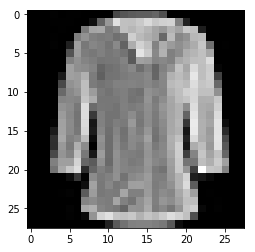

In [286]:
plt.imshow(images[4].numpy().squeeze(),cmap="Greys_r")

In [205]:
model.parameters()

<generator object Module.parameters at 0x7f63f6976468>

In [206]:
model

FeedforwardNeuralNetModel(
  (lin): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [219]:
model.nLayer

3

In [292]:
torch.sigmoid(torch.Tensor([-20]))

tensor([2.0612e-09])